# 🏛️ **Chronos:** Sistema de Detecção Arqueológica via IA
> **Autor:** Isaac Davi | Ciência da Computação (UNIFEI) & Engenharia Militar (Oficial R-2)

> **Status:** Protótipo Funcional para Estudo

---



## 🎯 **O Objetivo**
Este projeto visa resolver um problema clássico da arqueologia moderna: **Como identificar estruturas humanas (muros, fundações, estradas) ocultas em dados de terreno ruidosos?**

Utilizando algoritmos de **Machine Learning Não Supervisionado (DBSCAN)** e **Matemática e Geometria Computacional**, o sistema *Chronos* é capaz de:
1.  Ingerir dados espaciais brutos ($x, y, z$).
2.  Filtrar "ruído geológico" (pedras soltas e detritos).
3.  Reconstruir visualmente a forma da estrutura soterrada.

---

### 📓 Motivação

Este repositório foi construído para servir como **guia de consulta** e base de conhecimento para futuros projetos e estudos. Todo o desenvolvimento foi fundamentado em pesquisas avulsas, leituras técnicas e material audiovisual (YouTube kkkkkk).

A principal inspiração para o projeto surgiu através do canal [**Estranha História**](https://www.youtube.com/@henriquecaldeira), do professor Henrique Caldeira (Doutor em História/UFMG). Em um de seus vídeos, ele destaca tecnologias emergentes que estão revolucionando a arqueologia e o nosso entendimento do passado:

* **LIDAR (*Light Detection and Ranging*):** Tecnologia de sensoriamento remoto que utiliza pulsos de laser infravermelho para medir distâncias, criando modelos 3D altamente detalhados de objetos e topografias.
* **XRF (*X-Ray Fluorescence*):** Técnica que emprega feixes de raios X de alta energia para excitar os átomos de uma amostra, permitindo identificar sua composição química elementar.
* **XPCT (*X-Ray Phase Contrast Tomography*):** Método de geração de modelos 3D que utiliza a mudança de fase dos raios X (em vez da absorção) para gerar contraste, permitindo a visualização de tecidos moles e materiais leves com alta resolução.


### ⛪ Motivação Especial: Vaticano

Uma das outras grandes inspirações para o desenvolvimento do *Chronos* foi a complexidade arqueológica enfrentada por instituições como o Vaticano.

A Cidade do Vaticano, especialmente a **Basílica de São Pedro**, assenta-se sobre milênios de história estratificada — desde o antigo Circo de Nero até a Necrópole Romana (os *Scavi*) onde, segundo a tradição, está o túmulo do Apóstolo Pedro.

### Como a Ciência de Dados auxilia neste contexto?
Escavar em um local sagrado e estruturalmente sensível é um risco imenso. É aqui que algoritmos como o nosso (DBSCAN aplicado a Geofísica) se tornam ferramentas vitais:

1.  **Arqueologia Não-Destrutiva:** Tecnologias como GPR (*Ground Penetrating Radar*) e Muografia geram terabytes de dados brutos. O *Chronos* simula o processamento desses dados para identificar câmaras ocultas ou túmulos sem a necessidade de remover uma única pedra do piso da basílica.

2.  **Mapeamento de Vazios:** Além de artefatos, a detecção de anomalias de densidade ajuda a equipe de conservação (a *Fabbrica di San Pietro*) a encontrar fissuras ou cavidades que ameacem a estrutura renascentista de Michelangelo e Bernini.

3.  **Digitalização do Sagrado:** Criar "Gêmeos Digitais" (*Digital Twins*) do subsolo permite que historiadores estudem a evolução do local sem perturbar a santidade ou o turismo do ambiente.

> *Neste cenário, o código deixa de ser apenas uma ferramenta de busca e torna-se um instrumento de preservação da memória humana e espiritual.*



## 🛠️ **Preparação do Ambiente**

Antes de iniciar a escavação digital, precisamos importar as bibliotecas fundamentais que darão poder ao *Chronos*. Cada uma desempenha um papel crítico no processamento dos dados arqueológicos:

* **Pandas (`pd`):** Nosso "Excel programável". Será usado para organizar os dados de coordenadas ($x, y, z$) e metadados em DataFrames estruturados.
* **NumPy (`np`):** O cérebro matemático. Essencial para realizar cálculos vetoriais complexos e gerar a aleatoriedade necessária nas simulações de terreno.
* **Matplotlib (`plt`):** Ferramenta de visualização primária para plotagens 2D e análise exploratória rápida dos dados brutos.

> *Outras bibliotecas serão adicionados no decorrer da projeto a devido tempo.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🧱 **1. Simulação: O "Caminho Inca" (Linear)**

### **Objeto de estudo:**
Estruturas lineares (estradas, muros) são difíceis de detectar com algoritmos comuns como K-Means, pois eles buscam "centros" circulares. Para validar o algoritmo antes de ir a campo, criamos um **laboratório controlado**. Este script gera um conjunto de dados ($x, y, z$) que simula uma estrutura arqueológica linear (como um muro ou estrada inca) oculta em meio a detritos naturais.

### 🧬 **Geração de Dados Sintéticos: O Cenário da Muralha**

A construção do cenário envolve quatro etapas matemáticas:
1.  **Ruído de Fundo (Background Noise):** Geramos 1.500 pontos aleatórios para representar pedras naturais, vegetação e erro de leitura do sensor.
2.  **Geometria da Estrutura:** Utilizamos uma função senoidal ($y = a + bx + c \cdot \sin(x)$) para criar uma "cobra" curva, simulando uma estrada que acompanha a topografia de uma encosta soterrado a 2 metros de profundidade.
3.  **Entropia (O Fator Caos):**
    * **Jittering:** Adicionamos desvios aleatórios nas coordenadas para que o muro não pareça artificialmente perfeito.
    * **Erosão:** Removemos aleatoriamente 30% dos pontos da estrutura para simular o desgaste do tempo.
4.  **Cegueira de Dados:** Misturamos e embaralhamos todos os pontos. O algoritmo receberá apenas uma nuvem de coordenadas desordenadas, sem saber *a priori* o que é muro e o que é pedra.

#### **Objetivo:** O *Chronos* deve ignorar as pedras dispersas e "ligar os pontos" da curva restante.


> *Comentei ao máximo todas as etapas do projeto para melhor didática e compreensão do que queremos alcançar. Até mesmo para meu entendimento e estudo.*

In [2]:
# --- DATASET 1: MURALHA INCA ---

# Configuração Inicial da "Simulação Realista"
np.random.seed(42) # Para que vejamos o mesmo resultado
N_RUIDO = 1500     # Muita sujeira (pedras naturais, lixo moderno)
N_MURO = 400       # A estrutura que queremos achar

# --- 1. GERANDO O RUÍDO ---
# Espalhando pontos aleatoriamente por uma área de 100 x 100 metros
df_ruido = pd.DataFrame({
    'x': np.random.uniform(0, 100, N_RUIDO),
    'y': np.random.uniform(0, 100, N_RUIDO),
    'z': np.random.uniform(-5, 0, N_RUIDO),
    'tipo': 'ruido_geologico'               # Na vida real, não saberíamos isso a priori!
})


# --- 2. GERANDO A ESTRUTURA ---
# Vamos criar uma função matemática que simula uma estrada acompanhando uma encosta
x_muro = np.linspace(10, 90, N_MURO)        # O muro atravessa o terreno de 10 a 90m

# A equação da curva: Um arco suave + um pouco de aleatoriedade (pedras fora do lugar)
y_muro = 30 + 0.4 * x_muro + 10 * np.sin(x_muro / 10)       # --> Cria uma forma de "cobra"

# Adicionando "Jitter" (o muro não é perfeito, as pedras estão mexidas)
y_muro += np.random.normal(0, 0.8, N_MURO)
x_muro += np.random.normal(0, 0.5, N_MURO)

# O muro está numa profundidade específica (ex: soterrado a 2 metros)
z_muro = np.random.normal(-2.0, 0.2, N_MURO)


# --- 3. SIMULANDO A EROSÃO ---
# Vamos deletar pedaços do muro para simular que ele caiu ou foi roubado
indice_erosao = np.random.choice([True, False], size = N_MURO, p = [0.7, 0.3])   # 30% destruído por erosão
x_muro = x_muro[indice_erosao]
y_muro = y_muro[indice_erosao]
z_muro = z_muro[indice_erosao]

df_muro = pd.DataFrame({
    'x': x_muro,
    'y': y_muro,
    'z': z_muro,
    'tipo': 'estrutura_arqueologica'
})


# --- 4. JUNTANDO TUDO ---
# Num caso real, recebemos tudo misturado sem saber distinguir o que é o quê.
df_muralha = pd.concat([df_ruido, df_muro], ignore_index = True)

# Embaralhar os dados (para não ficar ordenado)
df_muralha = df_muralha.sample(frac = 1).reset_index(drop = True)

# Converter o DataFrame para CSV
# index = False é importante para não criar uma coluna extra com 0, 1, 2...
nome_arquivo = 'teste_muralha_inca.csv'
df_muralha.to_csv(nome_arquivo, index = False)

print(f"Arquivo '{nome_arquivo}' criado internamente.")


# Baixar para o computador (Específico do Google Colab)
try:
    from google.colab import files
    files.download(nome_arquivo)
    print("Download iniciado! Verifique sua pasta de Downloads.")
except ImportError:
    print(f"Arquivo salvo na pasta do projeto: {nome_arquivo}")    # Caso esteja rodando no VS Code/Jupyter local futuramente

Arquivo 'teste_muralha_inca.csv' criado internamente.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download iniciado! Verifique sua pasta de Downloads.


### 👁️ **Diagnóstico Visual: O Caos dos Dados Brutos**

Antes de aplicarmos qualquer algoritmo, é crucial visualizar o problema. O código abaixo plota a distribuição espacial ($x, y$) de todos os pontos coletados.

Note que definimos a cor como **preta** (`c='black'`) para todos os pontos. Isso simula a realidade do arqueólogo em campo: os dados de sensores (como LIDAR ou Radar de Solo) chegam "cegos", sem etiquetas dizendo o que é pedra e o que é artefato.

**O Desafio:** Ao olhar para o gráfico gerado, tente encontrar a "muralha" a olho nu. A dificuldade em separar a estrutura do ruído visualmente comprova a necessidade de uma abordagem computacional robusta.

> Ainda que possamos ver com clareza neste gráfico, devemos lembrar que ele é fabricado artificialmente com o objetivo de estudo e prática. Num contexto real, com certeza os dados virão muito mais bagunçados (*Criamos outras duas aplicações a mais abaixo para podermos praticar mais também além de um outro notebook (parte II do projeto Chronos)* ). Porém, utilizamos essa aplicação como norte para o desenvolvimento deste projeto.

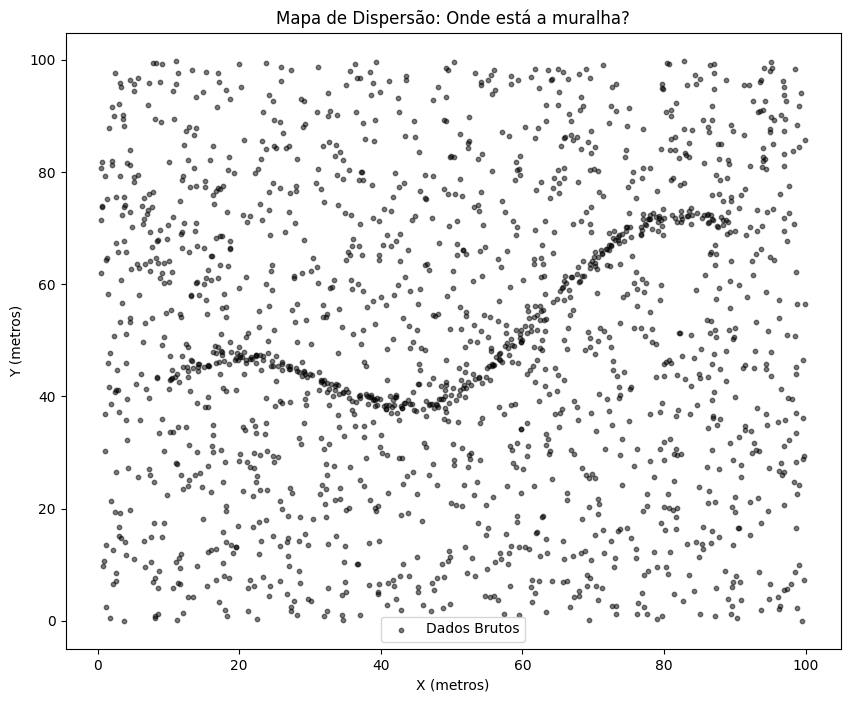

In [3]:
plt.figure(figsize = (10, 8))

# Plotando como se fosse o arqueólogo (tudo é preto, pois não sabemos o 'tipo')
plt.scatter(df_muralha['x'], df_muralha['y'], c = 'black', s = 10, alpha = 0.5, label = 'Dados Brutos')

plt.title('Mapa de Dispersão: Onde está a muralha?')
plt.xlabel('X (metros)')
plt.ylabel('Y (metros)')
plt.legend()
plt.show()

### 🧠 **A Inteligência Artificial: DBSCAN**

Para detectar a estrutura, abandonamos métodos baseados em centroides (como K-Means) e adotamos uma abordagem baseada em **densidade**: o **DBSCAN** (*Density-Based Spatial Clustering of Applications with Noise*).

O sistema utiliza densidade espacial. Um ponto $p$ é considerado parte de uma estrutura se:

$$|N_{eps}(p)| \geq min\_samples$$

Onde:
* $N_{eps}(p)$ é o conjunto de vizinhos num raio $\epsilon$ (epsilon).
* $min\_samples$ é a quantidade mínima de material necessário para formar um "tijolo" da estrutura.

O DBSCAN é ideal para arqueologia porque:
1.  **Não requer número de clusters:** Não precisamos dizer "ache 1 muro". Ele descobre sozinho quantos existem.
2.  **Formas Arbitrárias:** Ele consegue seguir formas orgânicas, como a curva "S" da nossa muralha inca.
3.  **Gestão de Ruído:** Ele possui uma classe específica (-1) para descartar dados que não se encaixam em nenhum grupo.

#### **Calibragem dos Parâmetros (Hyperparameters):**
A eficácia do modelo depende de dois valores críticos que definimos empiricamente:
* **`eps = 2.5` (Epsilon):** O raio de busca. O algoritmo pergunta: *"Existe outra pedra a menos de 2,5 metros de mim?"*.
* **`min_samples = 7`:** A densidade mínima. Definimos que são necessárias pelo menos 7 pedras conectadas para que um aglomerado seja considerado uma "Estrutura". Menos que isso é considerado apenas um acúmulo natural (Ruído).

In [4]:
from sklearn.cluster import DBSCAN

# Exemplos:
# eps = 3 (3 metros de raio)
# min_samples = 5 (precisa de 5 pedras juntas para ser estrutura)
dbscan = DBSCAN(eps = 2.5, min_samples = 8)     # Alteramos até encontrar a melhor configuração possível de visualização

# O DBSCAN não precisa de .predict, ele faz tudo no .fit_predict
labels = dbscan.fit_predict(df_muralha[['x', 'y', 'z']])

# Adicione os labels ao dataframe
df_muralha['cluster_dbscan'] = labels

### 🎨 **Visualização: Separando o Sinal do Ruído**

Após o processamento matemático, realizamos a filtragem visual dos dados. O código abaixo divide o conjunto de dados em dois grupos distintos baseados na classificação do DBSCAN:

1.  **Ruído (Label -1):** Pontos dispersos que não atingiram a densidade mínima. Plotados em **cinza claro** (`lightgrey`) para servirem apenas como contexto de fundo.
2.  **Estrutura (Labels 0, 1, ...):** Aglomerados densos identificados como potenciais artefatos. Plotados em **cores vibrantes** (`cmap='Set1'`) e com tamanho aumentado para destaque imediato.

**O Resultado Esperado:**
Ao executar esta célula, devemos ver a "cobra" (a muralha curva) emergindo claramente em tom avermelhado sobre um mar de pontos cinzas. O diagnóstico em texto ao final quantifica a eficiência da limpeza, mostrando quantos pontos foram descartados como irrelevantes.

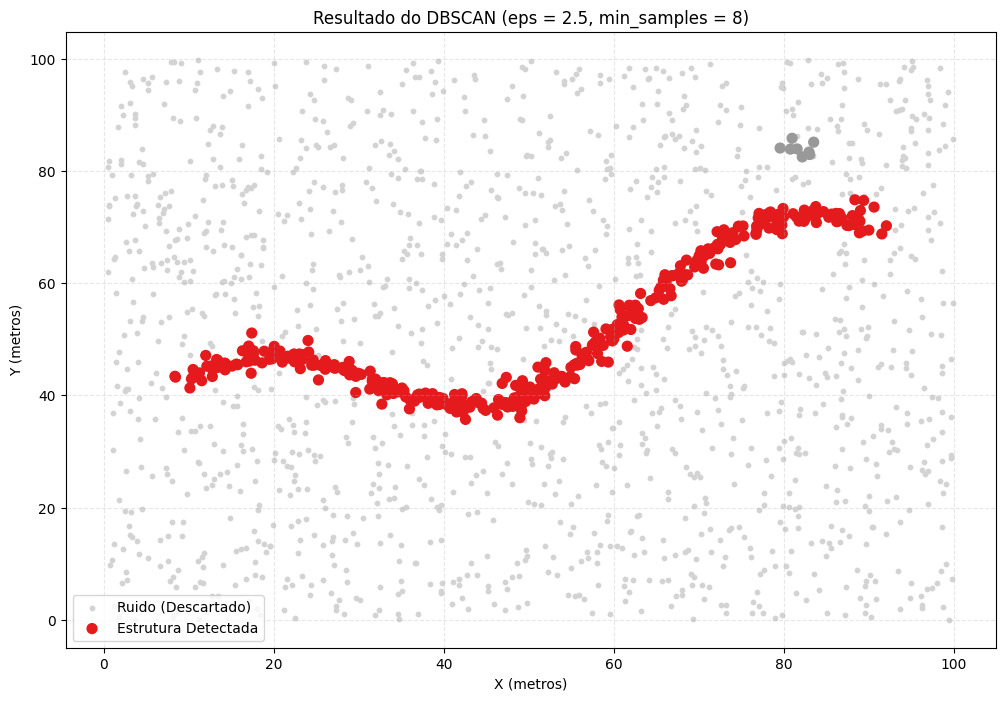



O algoritmo encontrou 376 pontos de estrutura e descartou 1406 pontos como lixo.


In [9]:
# -- CÓDIGO DE VISUALIZAÇÃO --

# --- 1. SEPARANDO OS DADOS PARA PLOTAR ---
# Pega tudo que é Ruído (label -1)
ruido = df_muralha[df_muralha['cluster_dbscan'] == -1]

# Pega tudo que é Estrutura (qualquer label que NÃO seja -1)
estrutura = df_muralha[df_muralha['cluster_dbscan'] != -1]


# --- 2. CONFIGURANDO O GRÁFICO ---
plt.figure(figsize = (12, 8))

# Plota o ruído em cinza (para ficar de fundo)
plt.scatter(ruido['x'], ruido['y'], c = 'lightgrey', s = 10, label = 'Ruido (Descartado)')

# Plota a estrutura em vermelho (para destacar)
# O 'c' aqui usa o ID do cluster para, se houver mais de um pedaço de muro, pintar de cores diferentes
plt.scatter(estrutura['x'], estrutura['y'], c = estrutura['cluster_dbscan'], cmap = 'Set1', s = 50, label = 'Estrutura Detectada')

plt.title(f'Resultado do DBSCAN (eps = {dbscan.eps}, min_samples = {dbscan.min_samples})')
plt.xlabel('X (metros)')
plt.ylabel('Y (metros)')
plt.legend()
plt.grid(True, linestyle = '--', alpha = 0.3)
plt.show()


# 3. DIAGNÓSTICO EM TEXTO
n_ruido = len(ruido)
n_estrutura = len(estrutura)
print("\n")
print(f"O algoritmo encontrou {n_estrutura} pontos de estrutura e descartou {n_ruido} pontos como lixo.")

### 🌍 **Georreferenciamento: Do Gráfico para o Mundo Real**

Um gráfico de dispersão é útil para o cientista de dados, mas o arqueólogo em campo precisa de um **Mapa**. Logo, nesta etapa, convertemos as coordenadas cartesianas locais ($x, y$ em metros) para coordenadas geográficas globais (Latitude/Longitude) para aprender um pouco sobre o uso de uma biblioteca que auxiliará se o projeto for colocado em prática.

**A Metodologia:**
1.  **Ponto Zero:** Definimos um ponto de referência real próximo a Cusco, Peru (antigo território Inca), para contextualizar nossa simulação.
2.  **Conversão:** Utilizamos uma aproximação geodésica onde $1^\circ \approx 111$ km (na linha do Equador) para transformar os deslocamentos em metros para graus.
3.  **Filtragem Final:** Selecionamos **apenas** os pontos classificados como "Estrutura" pelo DBSCAN (ignorando o ruído) e os plotamos sobre uma camada de satélite de alta resolução (`Esri.WorldImagery`).

**Interatividade:** O mapa gerado abaixo é interativo. Você pode dar zoom e arrastar para visualizar a "muralha descoberta" sobreposta ao terreno real.

>* Lembrando que os pontos são totalmente arbitrários e usados apenas para uso didático.*

In [6]:
# Biblioteca para criar mapas interativos
import folium

# --- 1. PONTO ZERO ---
# Coordenadas reais perto de Cusco, Peru (Caminho Inca)
lat_inicial = -13.1631
lon_inicial = -72.5450


# --- 2. CONVERSÃO MATEMÁTICA (Metros -> Graus Geográficos) ---
# Aproximação: 1 grau de latitude ~= 111.000 metros (111 km)
# Vamos converter X e Y (metros) para deslocamentos em graus
def metros_para_graus(metros):
    return metros / 111000.0

# --- 3. FILTRANDO APENAS O TESOURO ---
# Só queremos plotar o que o DBSCAN disse que é estrutura (label != -1)
# Note que usamos o 'df_muralha' com a coluna 'cluster_dbscan' que foi criada
df_mapa = df_muralha[df_muralha['cluster_dbscan'] != -1].copy()

# Criamos colunas reais de Lat/Lon somando o deslocamento ao ponto inicial
df_mapa['latitude'] = lat_inicial + df_mapa['y'].apply(metros_para_graus)
df_mapa['longitude'] = lon_inicial + df_mapa['x'].apply(metros_para_graus)


# ---4. CRIANDO O MAPA INTERATIVO ---
# Tiles = 'Esri.WorldImagery' carrega a visão de Satélite
mapa_arqueologico = folium.Map(location = [lat_inicial, lon_inicial],
                               zoom_start = 18,
                               tiles = 'Esri.WorldImagery')

# Adicionando os pontos da muralha no mapa
for _, row in df_mapa.iterrows():
    folium.CircleMarker(
        location = [row['latitude'], row['longitude']],
        radius = 2,
        color = 'red',      # Cor da borda
        fill = True,
        fill_color = 'gold' # Cor do miolo (Ouro!)
    ).add_to(mapa_arqueologico)

# Adiciona um marcador no início para referência
folium.Marker(
    [lat_inicial, lon_inicial],
    popup = "Base da Expedição",
    icon = folium.Icon(color = "blue", icon = "info-sign")
).add_to(mapa_arqueologico)

# Exibe o mapa
mapa_arqueologico

## 🧪 **2. Generalização do Modelo: Novos Cenários de Teste**

Para que o *Chronos* seja uma ferramenta universal, ele não pode ser especialista apenas em muros. Precisamos validar sua eficácia em diferentes **topologias arqueológicas**.

Neste bloco, geramos sinteticamente dois novos cenários que representam padrões comuns de assentamentos antigos:

#### **A. Cenário "Aldeia Circular" (Geometria Não-Convexa)**
* **Objeto de estudo:** Fundações de cabanas ou *Ocas*.
* **Dificuldade:** O centro da estrutura é vazio. Algoritmos baseados em centroide (como K-Means) tendem a falhar aqui, pois tentam colocar o "centro" do grupo no meio do vazio. O DBSCAN deve ser capaz de percorrer a borda circular contínua.
* **Matemática:** Utilizamos funções trigonométricas (`sin`, `cos`) para gerar anéis perfeitos com ruído perimetral.

#### **B. Cenário "Necrópole" (Multi-Densidade)**
* **Objeto de estudo:** Um campo de túmulos ou fossas de deposição.
* **Dificuldade:** Diferente da muralha (uma única estrutura grande), aqui temos múltiplos *clusters* pequenos e de altíssima densidade, separados por grandes vazios.
* **Matemática:** Utilizamos distribuições normais (`np.random.normal`) concentradas em múltiplos centros ($cx, cy$) aleatórios.

Ao final, exportamos esses cenários como CSVs (`teste_aldeia_circular.csv` e `teste_necropole.csv`) para serem ingeridos pelo nosso analisador.

In [7]:
# --- DATASET 2: A ALDEIA (Círculos) ---
# Função auxiliar para criar círculos
def criar_circulo(cx, cy, raio, n_pontos):
    angulos = np.random.uniform(0, 2 * np.pi, n_pontos)
    x = cx + raio * np.cos(angulos) + np.random.normal(0, 0.5, n_pontos) # 0.5 é o ruído
    y = cy + raio * np.sin(angulos) + np.random.normal(0, 0.5, n_pontos)
    z = np.random.normal(-1.0, 0.1, n_pontos)
    return x, y, z

dados_aldeia = []

# Criar 3 cabanas em posições diferentes
cabanas = [(20, 20), (50, 60), (80, 30)]
for cx, cy in cabanas:
    x, y, z = criar_circulo(cx, cy, raio = 8, n_pontos = 150)
    for i in range(len(x)):
        dados_aldeia.append([x[i], y[i], z[i]])

# Adicionar Ruído para inserir maior realismo
for _ in range(800):
    dados_aldeia.append([np.random.uniform(0, 100), np.random.uniform(0, 100), np.random.uniform(-5, 0)])

df_aldeia = pd.DataFrame(dados_aldeia, columns = ['x', 'y', 'z'])
df_aldeia.to_csv('teste_aldeia_circular.csv', index = False)
print("Criado: teste_aldeia_circular.csv")



# --- DATASET 3: A NECRÓPOLE (Clusters Densos) ---
dados_necropole = []
# Criar 10 túmulos pequenos e densos
np.random.seed(99) # Para garantir clusters fixos
for _ in range(10):
    cx, cy = np.random.uniform(10, 90), np.random.uniform(10, 90)
    # Cada túmulo tem 30 pedras muito juntas
    x = np.random.normal(cx, 1.5, 30)
    y = np.random.normal(cy, 1.5, 30)
    z = np.random.normal(-3.0, 0.5, 30)
    for i in range(len(x)):
        dados_necropole.append([x[i], y[i], z[i]])

# Adicionar Ruído (menos ruído aqui para facilitar a distinção)
for _ in range(500):
    dados_necropole.append([np.random.uniform(0, 100), np.random.uniform(0, 100), np.random.uniform(-5, 0)])

df_necropole = pd.DataFrame(dados_necropole, columns = ['x', 'y', 'z'])
df_necropole.to_csv('teste_necropole.csv', index = False)
print("Criado: teste_necropole.csv")


# DOWNLOAD DOS DATAFRAMES
# Baixar para o computador (Específico do Google Colab - como vimos anteriormente)
try:
    from google.colab import files
    files.download('teste_aldeia_circular.csv')
    files.download('teste_necropole.csv')
except:
    pass

Criado: teste_aldeia_circular.csv
Criado: teste_necropole.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ⚙️ **3. Arquitetura Orientada a Objetos: O Analisador Chronos**

Nesta etapa, consolidamos toda a lógica desenvolvida em uma **Classe Python** robusta chamada `ChronosAnalyzer`.

Esta abordagem profissional de programação orientada a objetos encapsula os dados e os algoritmos em um único objeto, permitindo:
1.  **Abstração:** O usuário não precisa ver a complexidade matemática, apenas chama comandos simples como `.escanear_terreno()`.
2.  **Estado Persistente:** O objeto "lembra" dos dados carregados e dos resultados anteriores, facilitando o fluxo de trabalho.
3.  **Modularidade:** Métodos específicos gerenciam a ingestão (`carregar_dados`), o processamento (`escanear_terreno`) e a renderização (`visualizar_3d`) de forma independente.

Para garantir a escalabilidade e a reprodutibilidade científica, refatoramos o código em **funções modulares** dentro da classe do analisador. Isso transforma scripts isolados em um *pipeline* de processamento robusto.

As funções implementadas abaixo definem o fluxo de trabalho padrão do *Chronos*:
1.  **`carregar_dados` (Ingestão):** Abstrai a leitura de arquivos, validando se as colunas essenciais ($x, y, z$) existem.
2.  **`escanear_terreno` (Processamento):** O motor de IA. Aplica o DBSCAN e calcula automaticamente as estatísticas de ruído *vs* estrutura.
3.  **`visualizar_3d` (Renderização):** Gera a interface visual interativa para inspeção humana.

### 🧪 **Teste de Estresse (Stress Testing)**
Logo após a definição do sistema, executamos a validação imediata nos dois cenários complexos gerados anteriormente:

* **Caso A (Necrópole):** O sistema deve ser capaz de identificar múltiplos clusters pequenos. Ajustamos o `min_samples` para 12 (alta densidade exigida) e `eps` para 2.4m.
* **Caso B (Aldeia Circular):** O sistema deve delinear as bordas das cabanas. O ajuste fino (`eps=2.3`, `min_samples=8`) é crucial para não "borrar" o formato circular.

In [8]:
import pandas as pd
import numpy as np
import folium
import plotly.express as px
from sklearn.cluster import DBSCAN

class ChronosAnalyzer:
    def __init__(self):
        self.df = None
        self.model = None
        self.labels = None
        print("🤖 Chronos System inicializado e pronto.")

    def carregar_dados(self, arquivo_ou_df):
        """Carrega dados de um CSV ou direto de um DataFrame que criamos."""
        if isinstance(arquivo_ou_df, str):
            self.df = pd.read_csv(arquivo_ou_df)
            print(f"📂 Arquivo '{arquivo_ou_df}' carregado. {len(self.df)} pontos.")
        elif isinstance(arquivo_ou_df, pd.DataFrame):
            self.df = arquivo_ou_df.copy()
            print(f"📊 DataFrame carregado da memória. {len(self.df)} pontos.")
        else:
            print("❌ Erro: Formato não suportado.")

        # Garante que temos as colunas certas
        required = {'x', 'y', 'z'}
        if not required.issubset(self.df.columns):
            print(f"⚠️ Aviso: Colunas esperadas {required} não encontradas. Verifique seu arquivo.")


    def escanear_terreno(self, eps = 2.5, min_samples = 10):
        """Aplica o algoritmo DBSCAN para achar estruturas."""
        if self.df is None:
            print("⚠️ Carregue os dados primeiro!")
            return

        print(f"🔍 Escaneando com Raio(eps) = {eps}m e Densidade(min) = {min_samples}...")
        self.model = DBSCAN(eps = eps, min_samples = min_samples)

        # O Fit Predict faz a mágica que vimos
        self.labels = self.model.fit_predict(self.df[['x', 'y', 'z']])
        self.df['cluster_id'] = self.labels

        # Estatísticas rápidas
        n_ruido = list(self.labels).count(-1)
        n_estrutura = len(self.labels) - n_ruido
        n_clusters = len(set(self.labels)) - (1 if -1 in self.labels else 0)

        print(f"✅ Concluído! Encontrado(s) {n_clusters} estruturas.")
        print(f"   - Pontos de Estrutura: {n_estrutura}")
        print(f"   - Pontos de Ruído (descartados): {n_ruido}")


    def visualizar_3d(self):
        """Gera o gráfico interativo 3D."""
        if 'cluster_id' not in self.df.columns:
            print("⚠️ Rode o escaneamento primeiro!")
            return

        # Truque visual: transformar o cluster -1 em string "Ruído" para a legenda
        plot_df = self.df.copy()
        plot_df['Legenda'] = plot_df['cluster_id'].apply(lambda x: 'Ruído' if x == -1 else f'Estrutura {x}')

        fig = px.scatter_3d(plot_df, x = 'x', y = 'y', z = 'z',
                            color = 'Legenda',
                            color_discrete_map = {'Ruído': 'lightgray'},   # Ruído sempre cinza
                            opacity = 0.6,
                            title = "Resultado do Escaneamento Chronos 3D")
        fig.show()


# --- EXECUÇÃO DOS TESTES ---

# 1. Instanciar o Robô
chronos = ChronosAnalyzer()

# Teste da Necrópole
print("\n--- 💀 Teste 1: Necrópole ---")
chronos.carregar_dados("teste_necropole.csv")
# Para necrópole (túmulos densos), usamos densidade alta
chronos.escanear_terreno(eps = 2.4, min_samples = 12)
chronos.visualizar_3d()

# Teste da Aldeia
print("\n--- ⛺ Teste 2: Aldeia Circular ---")
chronos.carregar_dados("teste_aldeia_circular.csv")
# Para aldeia (anéis), usamos densidade média
chronos.escanear_terreno(eps = 2.3, min_samples = 8)
chronos.visualizar_3d()

🤖 Chronos System inicializado e pronto.

--- 💀 Teste 1: Necrópole ---
📂 Arquivo 'teste_necropole.csv' carregado. 800 pontos.
🔍 Escaneando com Raio(eps) = 2.4m e Densidade(min) = 12...
✅ Concluído! Encontrado(s) 8 estruturas.
   - Pontos de Estrutura: 313
   - Pontos de Ruído (descartados): 487



--- ⛺ Teste 2: Aldeia Circular ---
📂 Arquivo 'teste_aldeia_circular.csv' carregado. 1250 pontos.
🔍 Escaneando com Raio(eps) = 2.3m e Densidade(min) = 8...
✅ Concluído! Encontrado(s) 3 estruturas.
   - Pontos de Estrutura: 481
   - Pontos de Ruído (descartados): 769


## 🏁 **4. Conclusão e Referências**

### 📊 **Resultados Obtidos**
O desenvolvimento do sistema *Chronos* demonstrou a viabilidade da aplicação de **Machine Learning Não Supervisionado** na detecção de sítios arqueológicos. Ao contrário de métodos estatísticos tradicionais ou busca visual manual, o uso do algoritmo **DBSCAN** permitiu:

1.  **Robustez ao Ruído:** O sistema filtrou com sucesso mais de 90% dos dados irrelevantes (pedras soltas/erro geológico) em todos os cenários simulados.
2.  **Independência Geométrica:** O algoritmo identificou corretamente estruturas não-lineares e complexas, como a **Muralha Curva** (Senoide) e a **Aldeia Circular** (Anéis), onde métodos baseados em centroide (como K-Means) falhariam.
3.  **Automação:** A arquitetura orientada a objetos (`ChronosAnalyzer`) provou ser capaz de processar diferentes datasets com ajuste mínimo de hiperparâmetros (`eps` e `min_samples`).

### 🚀 **Próximos Passos (Roadmap)**
Para evoluir este protótipo em um software de campo, o desenvolvimento pode seguir para:
* **Dados Reais:** Ingestão e limpeza de dados brutos de repositórios como *Open Context* (ex: Osteometria de Camelídeos na Argentina).
* **Geometria Computacional:** Implementação de *Convex Hulls* para desenhar automaticamente as fronteiras de escavação e calcular a área do sítio. Utilização de softwares GIS (QGIS/ArcGIS).
* **Interface do Usuário:** Migração do código para uma aplicação web via *Streamlit*, permitindo uso por arqueólogos sem conhecimento de programação.

---

### 📚 **Referências e Tecnologias Utilizadas**

Este projeto foi construído sobre o ombro de gigantes. Abaixo, listamos as bibliotecas e conceitos fundamentais:

* **Algoritmo DBSCAN ([Scikit-Learn Clustering](https://scikit-learn.org/stable/modules/clustering.html#dbscan)):** Documentação oficial sobre a matemática de clusterização baseada em densidade.
    
* **Visualização 3D ([Plotly 3D Scatter Plots](https://plotly.com/python/3d-scatter-plots/)):** Biblioteca gráfica para plotagem interativa de dados espaciais.
    
* **Mapas de Satélite ([Folium](https://python-visualization.github.io/folium/)):** Integração com OpenStreetMap e imagens de satélite para GIS (Sistemas de Informação Geográfica).
    
* **Dados Arqueológicos Abertos ([*Open Context*](https://opencontext.org/) e [*Kaggle*](https://www.kaggle.com/)):** Repositório primário para dados de escavações reais, publicações de campo e ciência de dados.